In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import model_selection, preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
% matplotlib inline

In [70]:
labels = pd.read_csv('labels.csv')

In [71]:
train = pd.read_csv('train.csv')

In [72]:
train = pd.merge(train, labels, on = 'building_id')

In [5]:
train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3


In [73]:
test = pd.read_csv('test.csv')

In [76]:
test.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,6487,9,875,885,2,13,50,16,3,3,...,0,0,0,0,0,0,0,0,0,0
1,25011,27,414,1343,1,15,4,15,3,3,...,1,0,0,0,0,0,0,0,0,0
2,22297,15,477,30,1,20,33,15,3,3,...,0,0,0,0,0,0,0,0,0,0
3,18426,19,670,5197,0,0,10,11,3,3,...,0,0,1,0,0,0,0,0,0,0
4,9730,9,573,6317,2,9,53,17,3,3,...,0,0,0,0,0,0,0,0,0,0


In [77]:
test.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [10]:
train.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

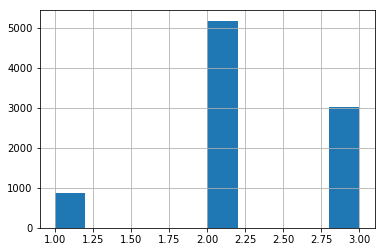

In [18]:
train['damage_grade'].hist(bins = 10)

Taking X and Y

In [81]:
number = preprocessing.LabelEncoder()
train = train.astype(str)
train = train.apply(number.fit_transform)
train = train.fillna(-999)
test = test.astype(str)
test = test.apply(number.fit_transform)
test = test.fillna(-999)

In [82]:
X_train = train.drop('damage_grade', axis=1)
Y_train = train.damage_grade

Selecting k best features

In [83]:
selk = SelectKBest(score_func=chi2, k = 20)
selected_features = selk.fit(X, Y)

Getting the best features

In [84]:
selected_indices = selected_features.get_support(indices=True)
X = X[X.columns[selected_indices]]
test = test[test.columns[selected_indices]]

In [49]:
train.corr()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,1.000000,-0.003178,0.001459,0.000246,0.001523,0.013429,-0.010688,0.006168,-0.000538,0.008857,...,-0.004942,0.005265,0.000433,-0.005049,0.008179,-0.005901,-0.003794,-0.003794,0.009581,0.015846
geo_level_1_id,-0.003178,1.000000,0.044011,-0.010630,0.064699,0.017156,-0.004078,-0.018967,0.006749,-0.220829,...,0.021019,-0.011092,0.013972,0.004972,0.006599,0.005914,0.004416,0.004416,-0.008412,0.166615
geo_level_2_id,0.001459,0.044011,1.000000,0.018182,-0.011027,-0.014533,0.001025,-0.012499,-0.011841,-0.027437,...,0.004663,-0.018636,-0.006809,0.000692,-0.019167,-0.010387,-0.016362,-0.016362,0.006545,0.002657
geo_level_3_id,0.000246,-0.010630,0.018182,1.000000,-0.007514,0.010061,-0.010170,-0.018583,-0.003802,-0.013002,...,0.013934,-0.001285,0.010676,-0.004870,0.004280,-0.007193,0.006915,0.006915,0.011574,-0.017794
count_floors_pre_eq,0.001523,0.064699,-0.011027,-0.007514,1.000000,0.058146,0.028810,-0.437941,0.064851,-0.148764,...,0.076666,0.024026,0.008394,0.018384,-0.005471,0.018744,-0.001705,-0.001705,-0.013449,0.112194
age,0.013429,0.017156,-0.014533,0.010061,0.058146,1.000000,0.017432,-0.050018,0.014722,-0.018242,...,-0.016327,-0.022436,0.000079,-0.006502,0.002633,-0.002261,-0.009634,-0.009634,-0.020909,0.087703
area_percentage,-0.010688,-0.004078,0.001025,-0.010170,0.028810,0.017432,1.000000,-0.052631,0.002340,-0.006307,...,-0.029507,-0.029300,-0.012017,-0.034949,0.018993,0.003909,0.005317,0.005317,0.007315,0.039987
height_percentage,0.006168,-0.018967,-0.012499,-0.018583,-0.437941,-0.050018,-0.052631,1.000000,-0.003168,0.040492,...,0.031884,0.026391,-0.004675,0.020711,0.015647,0.006649,-0.000163,-0.000163,0.020218,-0.120846
land_surface_condition,-0.000538,0.006749,-0.011841,-0.003802,0.064851,0.014722,0.002340,-0.003168,1.000000,-0.014611,...,0.020165,0.002122,0.009680,0.001585,-0.001499,0.008639,0.004571,0.004571,-0.011126,-0.010873
foundation_type,0.008857,-0.220829,-0.027437,-0.013002,-0.148764,-0.018242,-0.006307,0.040492,-0.014611,1.000000,...,-0.082223,-0.070507,-0.024111,-0.013437,0.021929,-0.004158,-0.002200,-0.002200,-0.001572,-0.102023


Scaling the values

In [85]:
scaler = MinMaxScaler()
X[X.columns] = scaler.fit_transform(X)
test[test.columns] = scaler.transform(test)

Cross Validation and Random Forest

In [94]:
kFold = model_selection.KFold(n_splits = 10, random_state = None, shuffle = True)
model = RandomForestClassifier(n_estimators=500, max_features='auto', oob_score = True, max_depth = 6)
prediction = model_selection.cross_val_score(model, X, Y, cv = kFold)

Prediction and Accuracy

In [95]:
print(prediction)
print('Accuracy: ', prediction.mean() * 100)

[0.61386139 0.66116612 0.63476348 0.63105727 0.61674009 0.64977974
 0.64867841 0.62004405 0.66740088 0.62444934]
Accuracy:  63.67940758833592
